In [1]:
from AGN_plot import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [23]:
def plot_default(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = spe
    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)

    Abu1.plot(ax=ax, spe=spe, label=label, color=color)
    ax.set_xlabel(r'$t$ (yr)', fontsize=25)
    ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + Abu1.name_div,
                  fontsize=25)
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax, spe=spe, color=color, linestyle='--')
        
    '''for i, dis in enumerate(d, 1):
        raw = np.loadtxt('./data/{}dis_inf'.format(str(i)))
        t = raw[:, 0] - 1e6
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='{}infinity'.format(str(i)),
                  color=Col[dis - 1],
                  linestyle='-.',
                  linewidth=5)'''
    ax.set_xlim([0, 1e8])
    ax.legend()

In [3]:
def plot_dis(spe, div=None, d=[], stop=True, ax=None):
    if d == []:
        d = np.arange(8) + 1
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    for i in d:
        j = str(i)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax, spe=spe, label=j + ' kpc', color=Col[i - 1])
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
        ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + Abu1.name_div,
                      fontsize=25)
        if stop:
            for i in d:
                j = '0' + str(i)
                Abu0 = Abu(j)
                if div != None:
                    Abu.Div(div)
                Abu0.plot(ax=ax, spe=spe, color=Col[i - 1], linestyle='--')
                Abu0.plot_ul(ax=ax, spe=spe, color=Col[i - 1])
                ax.fill_between(Abu0.dt,
                                Abu0.abu_l[:, eval('krome_idx_' + spe)],
                                Abu0.abu_u[:, eval('krome_idx_' + spe)],
                                color=Col[i - 1],
                                alpha=0.3)
    '''for i, dis in enumerate(d, 1):
        raw = np.loadtxt('./data/{}dis_inf'.format(str(i)))
        t = raw[:, 0] - 1e6
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='{}infinity'.format(str(i)),
                  color=Col[dis - 1],
                  linestyle='-.',
                  linewidth=5)'''
    ax.set_xlim([0, 1e8])
    ax.legend()

In [4]:
def plot_col(spe, div=None, d=[], stop=True, ax=None):
    if d == []:
        d = np.arange(8) + 1
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    for i in d:
        j = str(i)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax, spe=spe, label=j + ' kpc', color=Col[i - 1])
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
        ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + Abu1.name_div,
                      fontsize=25)
        if stop:
            for i in d:
                j = '0' + str(i)
                Abu0 = Abu(j)
                if div != None:
                    Abu.Div(div)
                Abu0.plot(ax=ax, spe=spe, color=Col[i - 1], linestyle='--')
                Abu0.plot_ul(ax=ax, spe=spe, color=Col[i - 1])
                ax.fill_between(Abu0.dt,
                                Abu0.abu_l[:, eval('krome_idx_' + spe)],
                                Abu0.abu_u[:, eval('krome_idx_' + spe)],
                                color=Col[i - 1],
                                alpha=0.3)
    '''for i, dis in enumerate(d, 1):
        raw = np.loadtxt('./data/{}dis_inf'.format(str(i)))
        t = raw[:, 0] - 1e6
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='{}infinity'.format(str(i)),
                  color=Col[dis - 1],
                  linestyle='-.',
                  linewidth=5)'''
    ax.set_xlim([0, 1e8])
    ax.legend()

In [5]:
def plot_group(*args):
    l = len(args)
    if l == 1:
        f, ax = plt.subplot(figsize=(24, 8))
        plot_all(args[0], ax=ax)
        return
    line = int(np.ceil(l / 2))
    f, ax = plt.subplots(line, 2, figsize=(24, 8 * line))
    ax = ax.flatten()
    if l % 2:
        f.delaxes(ax[-1])
    print(l)
    for i, spe in enumerate(args):
        plot_all(spe, ax=ax[i], d=np.array([4]))
    plt.tight_layout()

In [6]:
'''plot_group('H2O', 'H_DUSTH_DUSTO_DUST', 'CH3OH',
           'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'H2CO',
           'H_DUSTH_DUSTC_DUSTO_DUST')'''

"plot_group('H2O', 'H_DUSTH_DUSTO_DUST', 'CH3OH',\n           'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'H2CO',\n           'H_DUSTH_DUSTC_DUSTO_DUST')"

/Users/chang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(3.162277660168379e-06, 0.00031622776601683794)

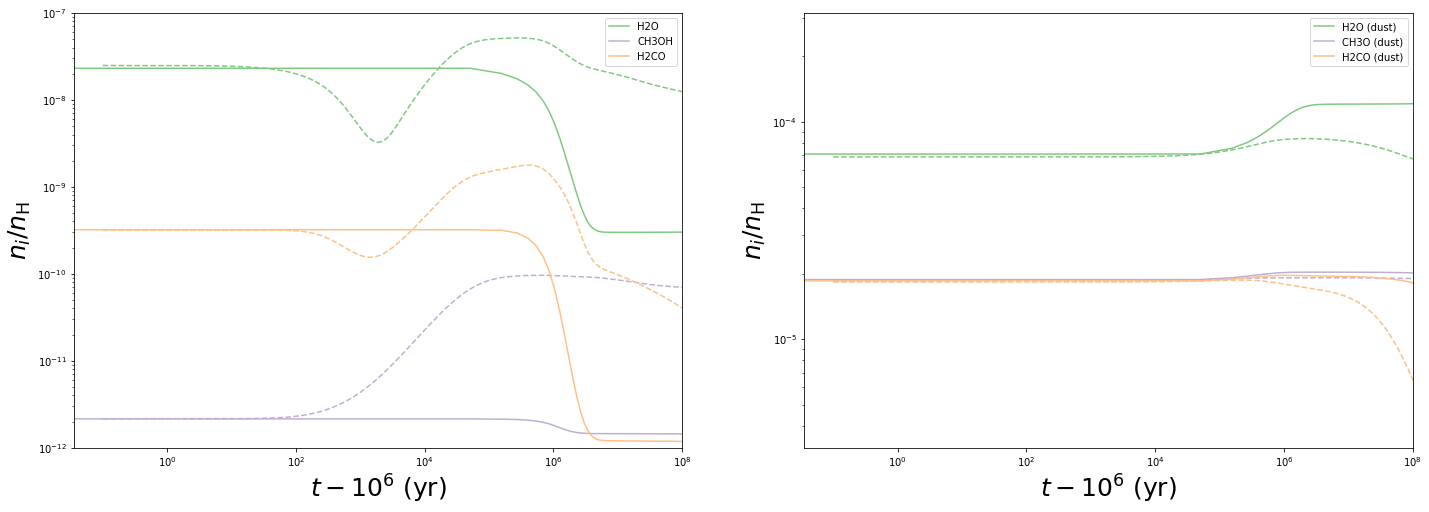

In [28]:
f, ax = plt.subplots(1, 2, figsize=(24, 8))
ax = ax.flatten()
c_default = ['#7fc97f','#beaed4','#fdc086']

plot_default('H2O', ax=ax[0], color=c_default[0])
plot_default('CH3OH', ax=ax[0], color=c_default[1])
plot_default('H2CO', ax=ax[0], color=c_default[2])
ax[0].set_ylabel(r'$n_i/n_{\mathrm{H}}$', fontsize=25)
ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([1e-12, 1e-7])

plot_default('H_DUSTH_DUSTO_DUST', ax=ax[1], color=c_default[0], label='H2O (dust)')
plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', ax=ax[1], color=c_default[1], label='CH3O (dust)')
plot_default('H_DUSTH_DUSTC_DUSTO_DUST', ax=ax[1], color=c_default[2], label='H2CO (dust)')
ax[1].set_ylabel(r'$n_i/n_{\mathrm{H}}$', fontsize=25)
ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_ylim([10**(-5.5), 10**(-3.5)])